In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random


In [2]:
data = pd.read_csv('penguin_combined_trace.csv').iloc[1:]
header = data.columns.values
print(header)

['time index' 'Acc_x' 'Acc_y' 'Acc_z' 'Mag_x' 'Mag_y' 'Mag_z' 'Temp, C'
 'Pressure, bar' 'Latitude' 'Longitude' 'Altitude']


In [3]:
print(len(data))
short_len = int(len(data))
short_data = data.head(n=short_len)#cv 


3560799


In [4]:
Pressure = np.array(short_data['Pressure, bar'].tolist())
Latitude = np.array(short_data['Latitude'].tolist())
Longitude = np.array(short_data['Longitude'].tolist())
Altitude = np.array(short_data['Altitude'].tolist())

In [5]:
pressure_bound = 0.5

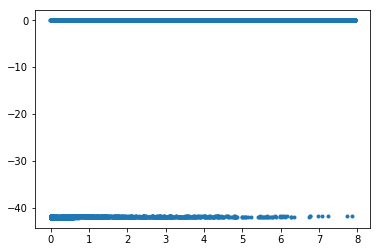

In [6]:
Lattozero = []

for i in range(len(Latitude)):
    if (math.isnan(Latitude[i])):
        Lattozero.append(0)
    else:
        Lattozero.append(Latitude[i])
        
    
        
plt.plot(Pressure, Lattozero,'.')

max(Pressure)

count_total = 0
count = 0
for i in range(len(Pressure)):
    if (Pressure[i] > pressure_bound):
        count = count + 1
    count_total = count_total + 1



In [7]:

## GPS Power Consumption 
# 38mA 
#38*time_operated/time_total
print(count)
print(count_total)
print("Average Current Used (mA): ", 38*(count_total-count)/count_total)

1492062
3560799
Average Current Used (mA):  22.077069219576842


In [8]:
def gpsatpressurebound(pressure_b):
    Lat_p = []
    Lon_p = []
    Alt_p = []
    for i in range(len(Pressure)):
        if (Pressure[i]<= pressure_b):
            if (math.isnan(Latitude[i])== False):
                Lat_p.append(Latitude[i])
                Lon_p.append(Longitude[i])
                Alt_p.append(Altitude[i])
    #     else:
    #         Lat_p.append(float('nan'))
    #         Lon_p.append(float('nan'))

    fx_p = np.array(Lat_p)
    fy_p = np.array(Lon_p)
    fz_p = np.array(Alt_p)

    R = 6378388.0 + fz_p # m
    arc= 2.0*np.pi*R/360.0 # m/°
    fdx_p = arc * np.cos(fx_p*np.pi/180.0) * np.hstack((0.0, np.diff(fy_p))) # in m
    fdy_p = arc * np.hstack((0.0, np.diff(fx_p))) # in m
    fdz_p = np.hstack((0.0, np.diff(fz_p)))

    fmx_p = np.cumsum(fdx_p)
    fmy_p = np.cumsum(fdy_p)
    fmz_p = np.cumsum(fdz_p)
    return fmx_p, fmy_p, fmz_p



In [9]:
fmx_p_0d08, fmy_p_0d08, fmz_p_0d08 = gpsatpressurebound(0.08)
fmx_p_0d1, fmy_p_0d1, fmz_p_0d1 = gpsatpressurebound(0.1)
fmx_p_0d5, fmy_p_0d5, fmz_p_0d5 = gpsatpressurebound(0.5)
fmx_p_1, fmy_p_1, fmz_p_1 = gpsatpressurebound(1)
fmx_p_2, fmy_p_2, fmz_p_2 = gpsatpressurebound(2)
fmx_p_3, fmy_p_3, fmz_p_3 = gpsatpressurebound(3)
fmx_p_8, fmy_p_8, fmz_p_8 = gpsatpressurebound(8)



In [10]:
print(len(fmy_p_0d08))
print(len(fmx_p_0d1))
print(len(fmx_p_0d5))
print(len(fmx_p_1))
print(len(fmx_p_2))
print(len(fmx_p_3))
print(len(fmx_p_8))

715
747
1222
1448
1678
1845
2057


[1592, 1161, 1723, 2538, 1507, 7105, 2927, 1032, 989, 989]
2056


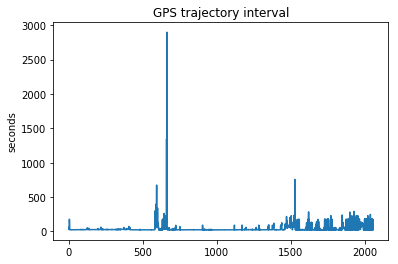

In [11]:


# These values include NaN


# Calculating the interval population
interval_population = []
lat_val = 0

for i in range(len(Latitude)):
    if i == 0:
        pass
    else:
        if (math.isnan(Latitude[i])):
            lat_val = lat_val + 1
        else:
    #        print("GPS fix available")
    #         print(lat_val)
    #         print(Latitude[i])
            interval_population.append(lat_val)
            lat_val = 0

# print(random.sample(interval_population,1))
print(interval_population[0:10])
print(len(interval_population))


plt.plot(np.array(interval_population)/40)
plt.title("GPS trajectory interval")
plt.ylabel('seconds')
plt.show()

43030.065265945195


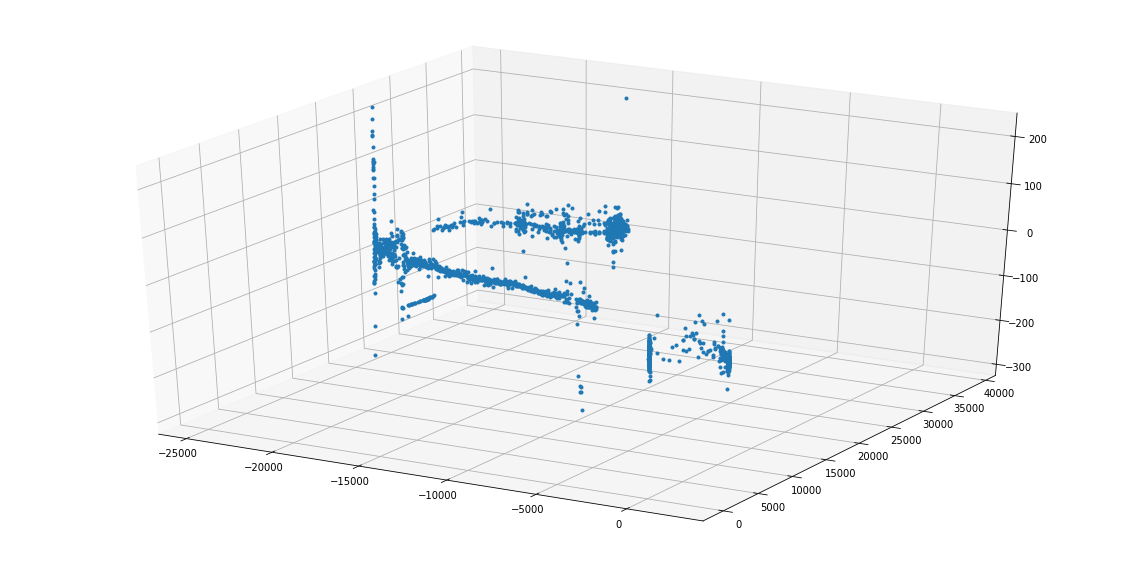

In [12]:
fx = short_data['Latitude'].dropna()
fy = short_data['Longitude'].dropna()
fz = short_data['Altitude'].dropna()

fx = np.array(fx)
fy = np.array(fy)
fz = np.array(fz)

R = 6378388.0 + fz # m
arc= 2.0*np.pi*R/360.0 # m/°
fdx = arc * np.cos(fx*np.pi/180.0) * np.hstack((0.0, np.diff(fy))) # in m
fdy = arc * np.hstack((0.0, np.diff(fx))) # in m
fdz = np.hstack((0.0, np.diff(fz)))

fmx = np.cumsum(fdx)
fmy = np.cumsum(fdy)
fmz = np.cumsum(fdz)

dx = fdx[1:]
dy = fdy[1:]
dz = fdz[1:]
    
distance_array = np.sqrt(dx**2 + dy**2 + dz**2)

fig = plt.figure(figsize=(20,10))
plot_3d = fig.gca(projection='3d')
s = 0
e = len(fmx)
plot_3d.plot(fmx[s:e], fmy[s:e], fmz[s:e],'.')

print(np.sqrt(fmx[-1]**2 + fmy[-1]**2 + fmz[-1]**2))

In [13]:
fmx_1hz = fmx
fmy_1hz = fmy
fmz_1hz = fmz 

fmx_2hz = []
fmy_2hz = []
fmz_2hz = []

k = 0
for i in range(len(fmx)):
    if k == 0: 
        fmx_2hz.append(fmx[i])
        fmy_2hz.append(fmy[i])
        fmz_2hz.append(fmz[i])
        k = k + 1
    else: 
        k = k - 1
        
fmx_10hz = []
fmy_10hz = []
fmz_10hz = []

k = 0
for i in range(len(fmx)):
    if k == 0: 
        fmx_10hz.append(fmx[i])
        fmy_10hz.append(fmy[i])
        fmz_10hz.append(fmz[i])
        k = k + 10
    else: 
        k = k - 1
        
fmx_50hz = []
fmy_50hz = []
fmz_50hz = []

k = 0
for i in range(len(fmx)):
    if k == 0: 
        fmx_50hz.append(fmx[i])
        fmy_50hz.append(fmy[i])
        fmz_50hz.append(fmz[i])
        k = k + 50
    else: 
        k = k - 1
        
fmx_100hz = []
fmy_100hz = []
fmz_100hz = []

k = 0
for i in range(len(fmx)):
    if k == 0: 
        fmx_100hz.append(fmx[i])
        fmy_100hz.append(fmy[i])
        fmz_100hz.append(fmz[i])
        k = k + 100
    else: 
        k = k - 1
        
        
# fig = plt.figure(figsize=(20,10))
# plot_3d = fig.gca(projection='3d')
# s = 0
# e = len(n_fmx)
# plot_3d.plot(n_fmx[s:e], n_fmy[s:e], n_fmz[s:e],'.')

## Path at different GPS frequency

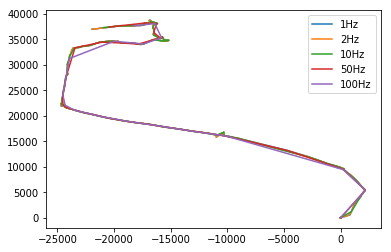

In [14]:
import matplotlib.pyplot as plt
plt.plot(fmx_1hz,fmy_1hz, label = '1Hz')
plt.plot(fmx_2hz,fmy_2hz, label = '2Hz')
plt.plot(fmx_10hz,fmy_10hz, label = '10Hz')
plt.plot(fmx_50hz,fmy_50hz, label = '50Hz')
plt.plot(fmx_100hz,fmy_100hz, label = '100Hz')
plt.legend()
plt.show()


## Path depends on different pressure bound

pressure bound ==  0.08


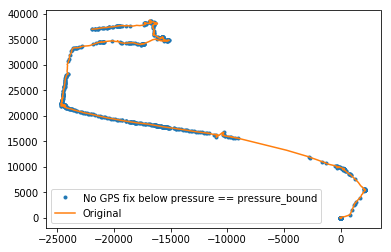

pressure bound ==  0.1


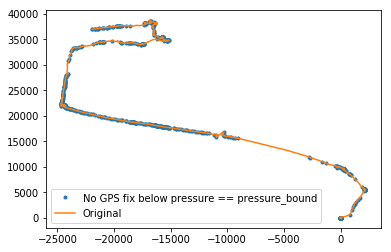

pressure bound ==  0.5


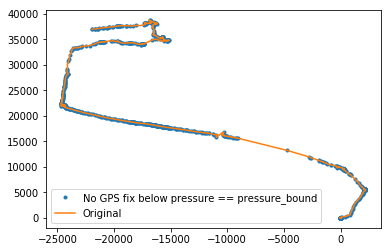

pressure bound ==  1


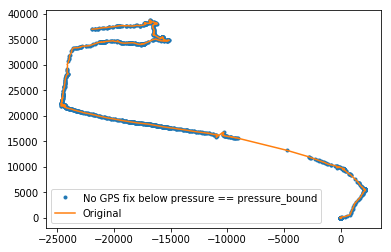

pressure bound ==  2


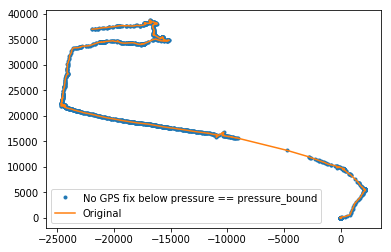

pressure bound ==  3


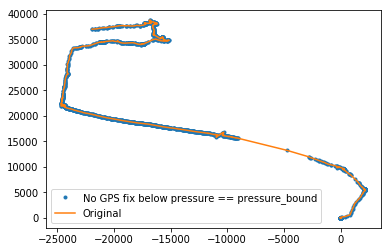

pressure bound ==  8


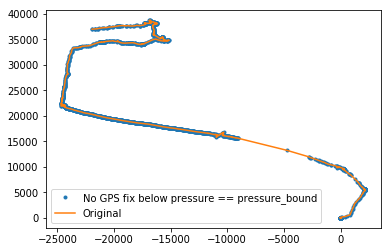

In [15]:
print("pressure bound == ", 0.08 )
plt.plot(fmx_p_0d08, fmy_p_0d08, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 0.1 )
plt.plot(fmx_p_0d1, fmy_p_0d1, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 0.5 )
plt.plot(fmx_p_0d5, fmy_p_0d5, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 1 )
plt.plot(fmx_p_1, fmy_p_1, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 2 )
plt.plot(fmx_p_2, fmy_p_2, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 3 )
plt.plot(fmx_p_3, fmy_p_3, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()

print("pressure bound == ", 8 )
plt.plot(fmx_p_8, fmy_p_8, '.', label = 'No GPS fix below pressure == pressure_bound')
plt.plot(fmx, fmy, label = 'Original')
plt.legend()
plt.show()